In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gaiaxpy import calibrate

In [2]:
def normalize(spectra):
    min1 = abs(min(spectra))
    temp_values = spectra + min1
    max1 = max(temp_values)
    return temp_values / max1

In [3]:
def normalize_v2(spectra):
    min1 = min(spectra)
    max1 = max(spectra)
    # Normalizar los espectros al rango de 0 a 1
    return (spectra - min1) / (max1 - min1)

In [4]:
raw_data_sy = pd.read_csv("./sy/XP_CONTINUOUS-Gaia DR3 4252471412111393280.csv")
raw_data_pn = pd.read_csv("./pn/XP_CONTINUOUS-Gaia DR3 2022052808961769088.csv")
raw_data_gr = pd.read_csv("./gr/XP_CONTINUOUS-Gaia DR3 157974880038112384.csv")
raw_data_sy.head()

,source_id,solution_id,bp_basis_function_id,bp_degrees_of_freedom,bp_n_parameters,bp_n_measurements,bp_n_rejected_measurements,bp_standard_deviation,bp_chi_squared,bp_coefficients,...,rp_n_parameters,rp_n_measurements,rp_n_rejected_measurements,rp_standard_deviation,rp_chi_squared,rp_coefficients,rp_coefficient_errors,rp_coefficient_correlations,rp_n_relevant_bases,rp_relative_shrinking
0,4252471412111393280,4545469030156206081,56,834,55,889,95,1.632906,2223.7634,"(2998.903219881245, 235.81366964145738, 195.73...",...,55,1235,34,1.71083,3453.7886,"(13909.13980174111, 5716.832103912931, -1243.1...","(21.435154, 20.31339, 20.719576, 21.37083, 22....","(0.10963622, 0.06726497, -0.17917101, -0.03964...",15,0.999978


In [5]:
sy_calibrated_spectra, sampling = calibrate(raw_data_sy, save_file=False)
sy_flux = sy_calibrated_spectra['flux'][0]
sy_flux_error = sy_calibrated_spectra['flux_error'][0]

In [6]:
pn_calibrated_spectra, sampling = calibrate(raw_data_pn, save_file=False)
pn_flux = pn_calibrated_spectra['flux'][0]
pn_flux_error = pn_calibrated_spectra['flux_error'][0]

In [7]:
gr_calibrated_spectra, sampling = calibrate(raw_data_gr, save_file=False)
gr_flux = gr_calibrated_spectra['flux'][0]
gr_flux_error = gr_calibrated_spectra['flux_error'][0]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


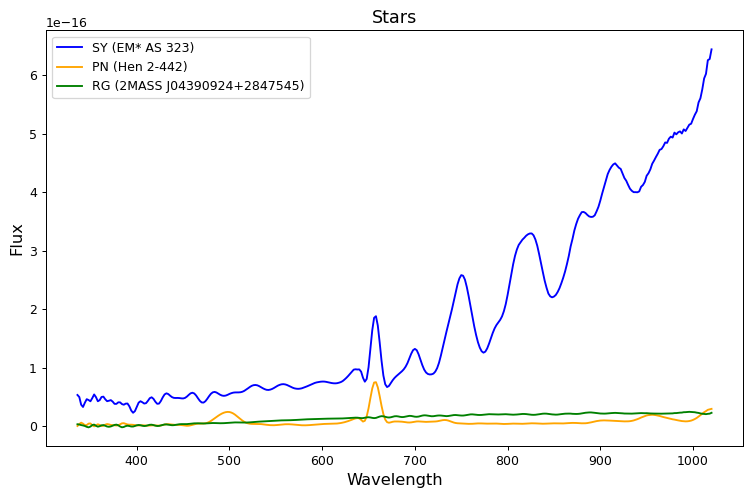

In [8]:
# % matplotlib inline
plt.subplots(figsize=(10, 6), dpi=90)

# Create line plot
plt.plot(sampling, sy_flux, c='blue', label='SY (EM* AS 323)')
plt.plot(sampling, pn_flux, c='orange', label='PN (Hen 2-442)')
plt.plot(sampling, gr_flux, c='green', label='RG (2MASS J04390924+2847545)')

# Set labels and title
plt.xlabel('Wavelength', fontsize=13)
plt.ylabel('Flux', fontsize=13)
plt.title('Stars', fontsize=14)
plt.legend(fontsize=10)

plt.savefig('stars.ps', format="ps")
plt.savefig('stars.pdf', format="pdf")
plt.savefig('stars.svg', format="svg")
# Display the plot
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


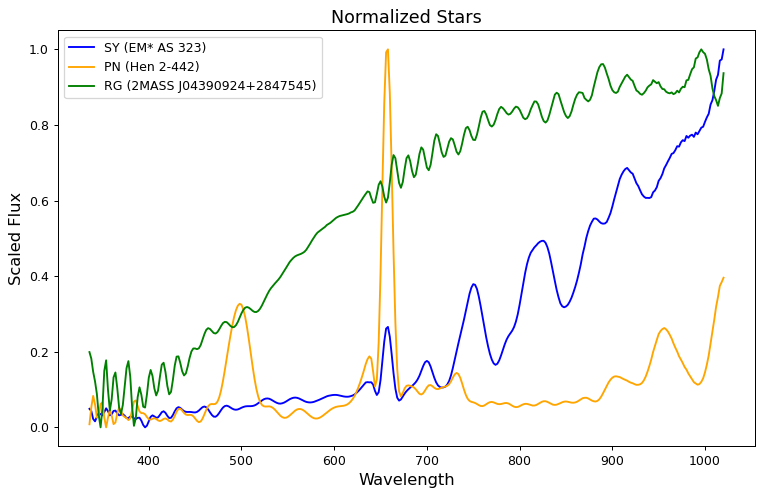

In [9]:
# % matplotlib inline
plt.subplots(figsize=(10, 6), dpi=90)

# Create line plot
plt.plot(sampling, normalize_v2(sy_flux), c='blue', label='SY (EM* AS 323)')
plt.plot(sampling, normalize_v2(pn_flux), c='orange', label='PN (Hen 2-442)')
plt.plot(sampling, normalize_v2(gr_flux), c='green', label='RG (2MASS J04390924+2847545)')

# Set labels and title
plt.xlabel('Wavelength', fontsize=13)
plt.ylabel('Scaled Flux', fontsize=13)
plt.title('Normalized Stars', fontsize=14)
plt.legend(fontsize=10)
plt.savefig('stars_normalized.ps', format="ps")
plt.savefig('stars_normalized.pdf', format="pdf")
plt.savefig('stars_normalized.svg', format="svg")
# Display the plot
plt.show()

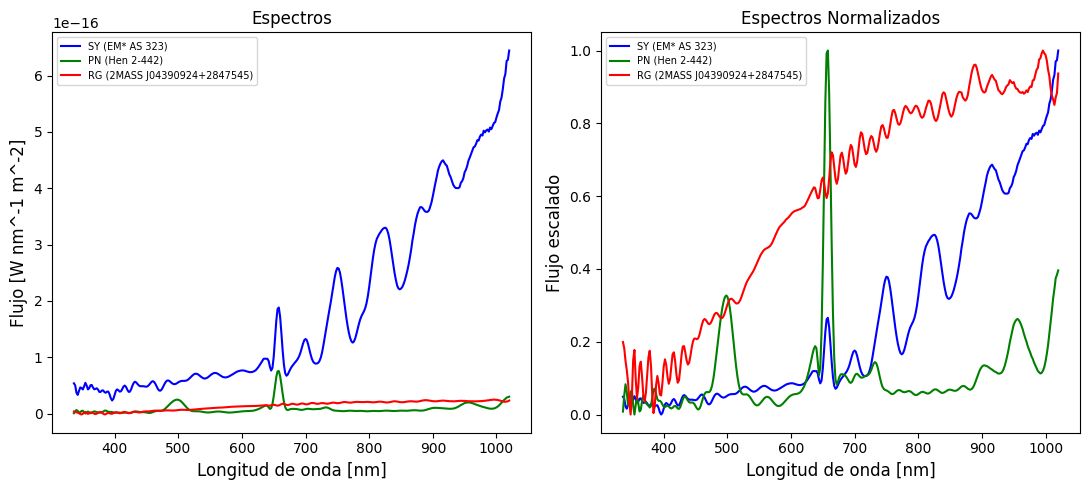

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Crear la figura y los ejes de las subtramas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

# Create line plot
ax1.plot(sampling, sy_flux, c='blue', label='SY (EM* AS 323)')
ax1.plot(sampling, pn_flux, c='green', label='PN (Hen 2-442)')
ax1.plot(sampling, gr_flux, c='red', label='RG (2MASS J04390924+2847545)')

ax1.set_xlabel('Longitud de onda [nm]', fontsize=12)
ax1.set_ylabel('Flujo [W nm^-1 m^-2]', fontsize=12)
ax1.set_title('Espectros', fontsize=12)
ax1.legend(fontsize=7)

# Create line plot
ax2.plot(sampling, normalize_v2(sy_flux), c='blue', label='SY (EM* AS 323)')
ax2.plot(sampling, normalize_v2(pn_flux), c='green', label='PN (Hen 2-442)')
ax2.plot(sampling, normalize_v2(gr_flux), c='red', label='RG (2MASS J04390924+2847545)')

ax2.set_xlabel('Longitud de onda [nm]', fontsize=12)
ax2.set_ylabel('Flujo escalado', fontsize=12)
ax2.set_title('Espectros Normalizados', fontsize=12)
ax2.legend(fontsize=7)

# Ajustar el espaciado entre subtramas
plt.tight_layout()
plt.savefig("combined.svg", format="svg")

# Mostrar el gráfico
plt.show()

In [20]:
noise = np.random.normal(loc=0.0, scale=0.05, size=343)
# noise

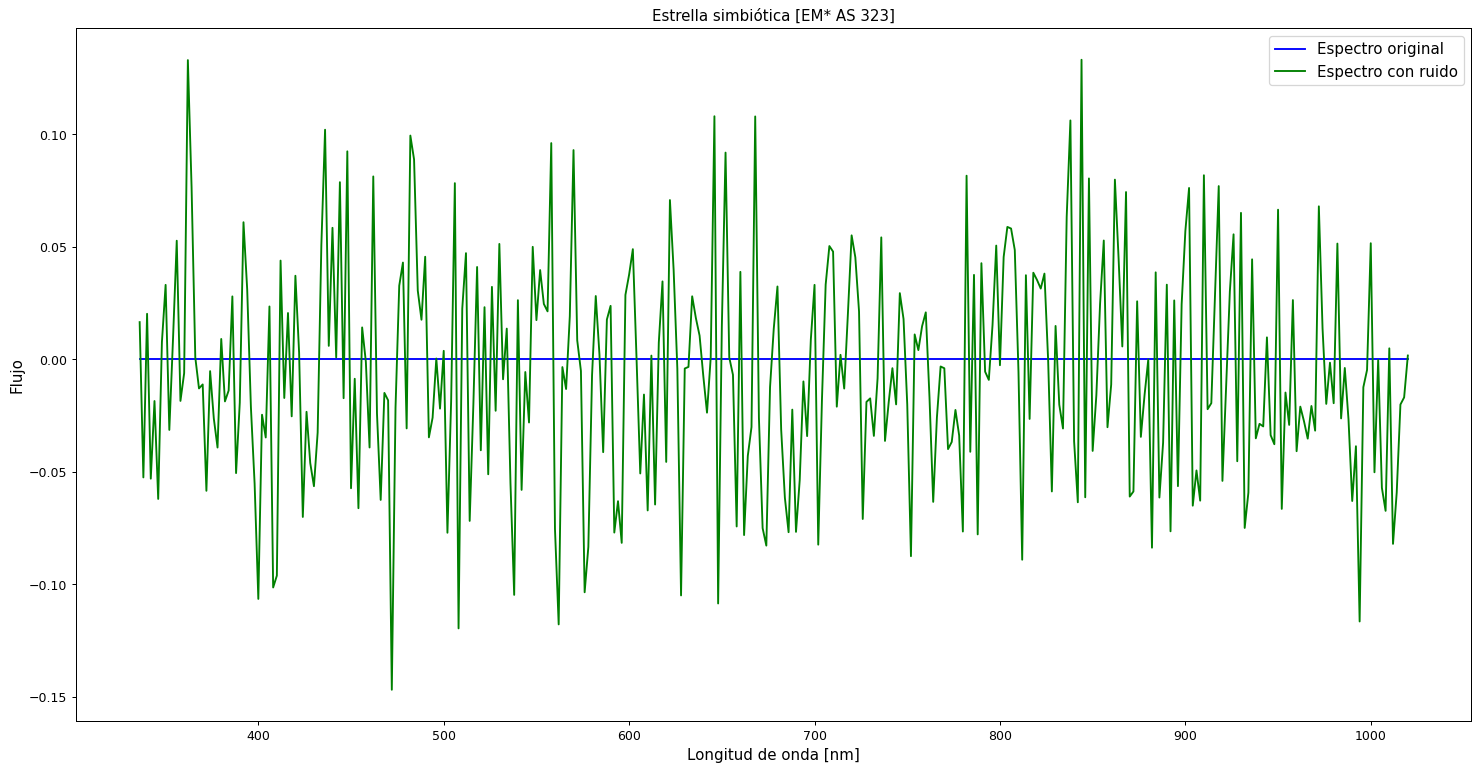

In [21]:
# % matplotlib inline
plt.subplots(figsize=(20, 10), dpi=90)

# Create line plot
plt.plot(sampling, sy_flux, c='blue', label='Espectro original')
plt.plot(sampling, sy_flux + noise, c='green', label='Espectro con ruido')

# Set labels and title
plt.xlabel('Longitud de onda [nm]', fontsize=12)
plt.ylabel('Flujo', fontsize=12)
plt.title('Estrella simbiótica [EM* AS 323]', fontsize=12)
plt.legend(fontsize=12)

# Display the plot
plt.show()

In [22]:
sy_flux_normalized = normalize_v2(sy_flux)

In [23]:
noise_01 = np.random.normal(loc=0.0, scale=0.1, size=343)
noise_001 = np.random.normal(loc=0.0, scale=0.01, size=343)
noise_002 = np.random.normal(loc=0.0, scale=0.02, size=343)
noise_003 = np.random.normal(loc=0.0, scale=0.03, size=343)
noise_005 = np.random.normal(loc=0.0, scale=0.05, size=343)

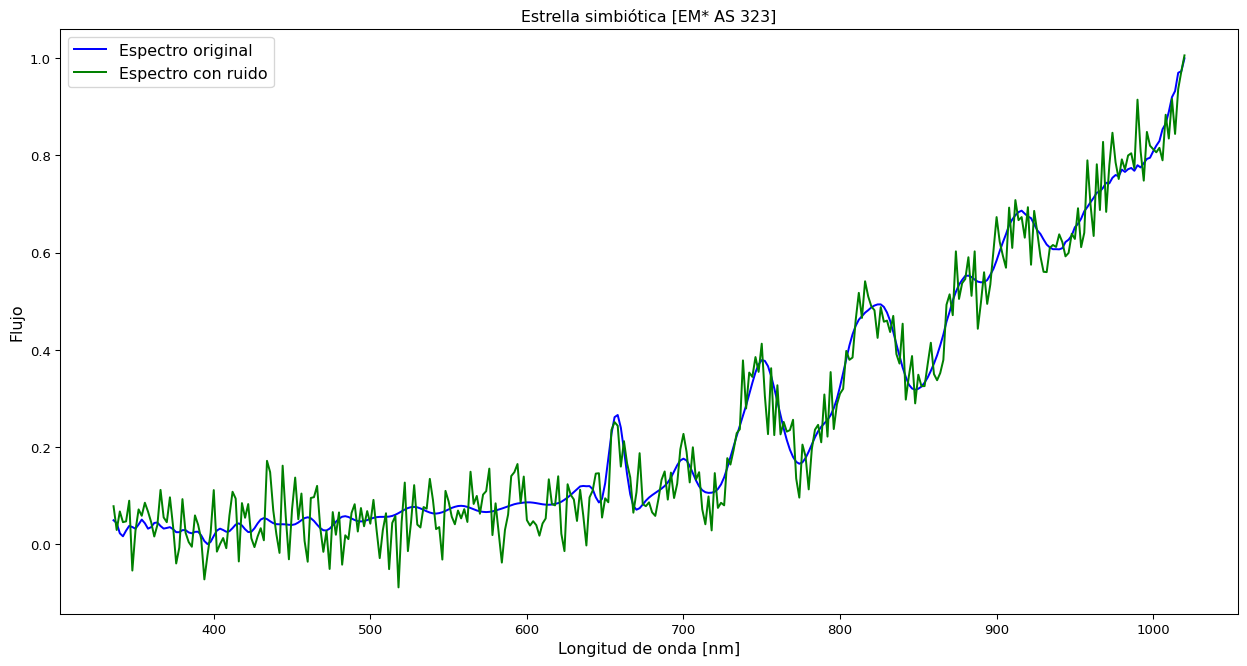

In [26]:
# % matplotlib inline
plt.subplots(figsize=(16, 8), dpi=95)

# Create line plot
plt.plot(sampling, sy_flux_normalized, c='blue', label='Espectro original')
plt.plot(sampling, sy_flux_normalized + noise_005, c='green', label='Espectro con ruido')

# Set labels and title
plt.xlabel('Longitud de onda [nm]', fontsize=12)
plt.ylabel('Flujo', fontsize=12)
plt.title('Estrella simbiótica [EM* AS 323]', fontsize=12)
plt.legend(fontsize=12)
plt.savefig("spectra_noise.svg", format="svg")

# Display the plot
plt.show()

<Figure size 640x480 with 0 Axes>

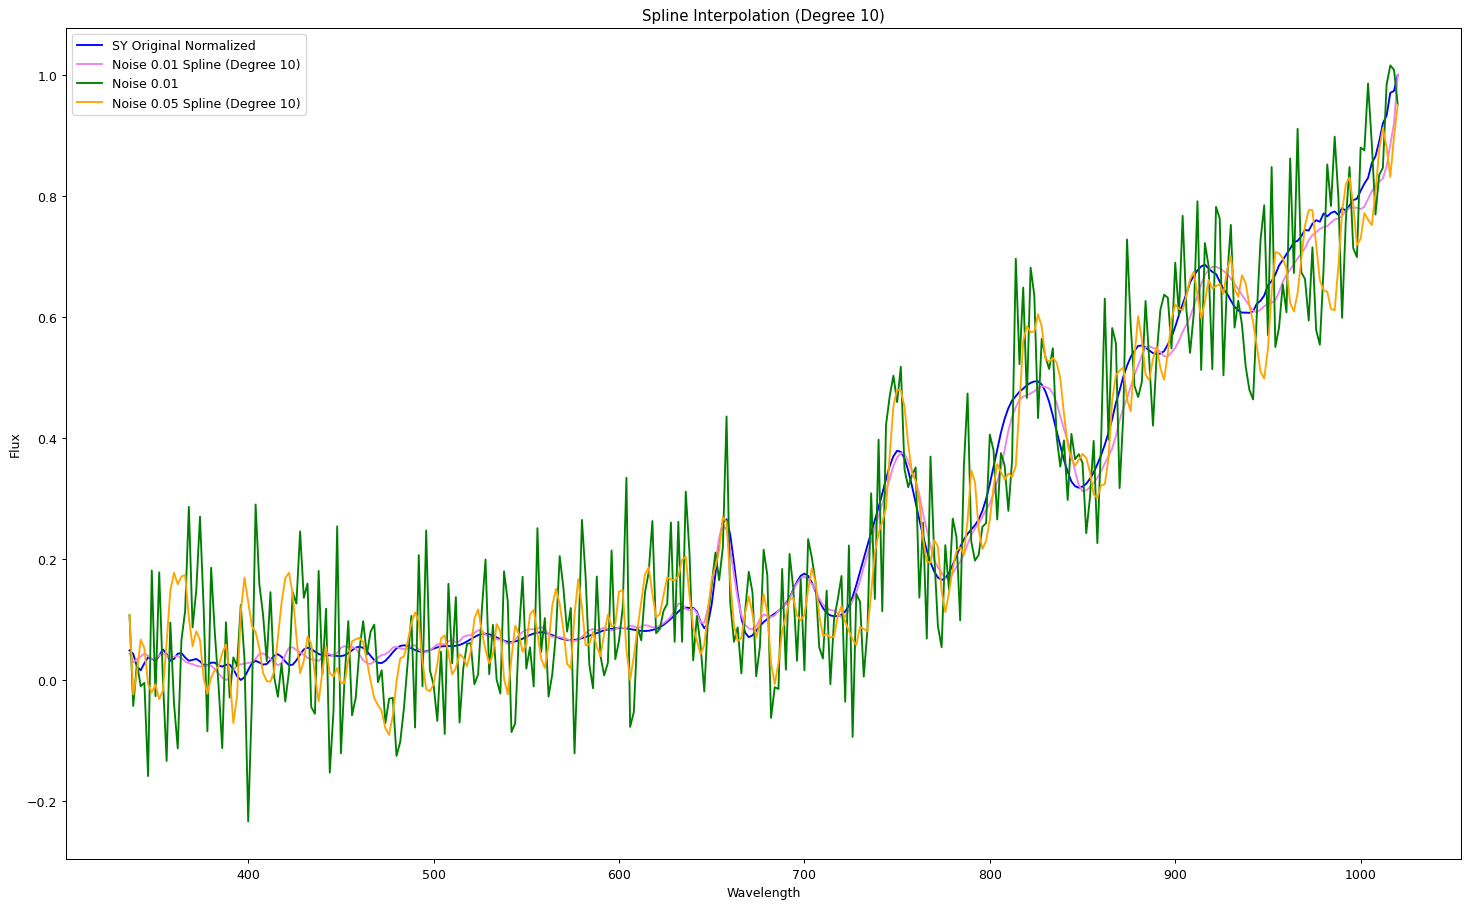

In [326]:
import numpy as np
from scipy.interpolate import BSpline
import matplotlib.pyplot as plt

# # Crear un objeto BSpline
# degree = 3  # Grado de la curva B-spline
# t = np.linspace(0, 1, len(sampling) - degree + 1)  # Valores de parámetro
# knots = np.concatenate(([t[0]] * degree, t, [t[-1]] * degree))  # Nodos
# spl = BSpline(knots, y, degree)

# Degree of the spline
n = 10
t = np.linspace(336, 1020, len(sampling) - n + 1)  # Valores de parámetro
knots = np.concatenate(([t[0]] * n, t, [t[-1]] * n))  # Nodos

nn = sy_flux_normalized + noise_001

# Create a spline object
spline = BSpline(knots, nn, n, extrapolate=False)

# Evaluate the spline on a finer grid
# x_new = np.linspace(336, 1020, 334)
x_new = np.arange(336, 1022, 2)
y_new = spline(x_new)
y_new = normalize_v2(y_new)

# Plot the original data points and the spline
plt.figure()
# % matplotlib inline
plt.subplots(figsize=(20, 12), dpi=90)

# Create line plot
plt.plot(sampling, sy_flux_normalized, c='blue', label='SY Original Normalized')
# plt.plot(sampling, nn, c = 'green', label = 'Noise 0.01')
plt.plot(x_new, y_new, c='violet', label='Noise 0.01 Spline (Degree {})'.format(n))

nn = sy_flux_normalized + noise_01

# Create a spline object
spline = BSpline(knots, nn, n, extrapolate=False)

# Evaluate the spline on a finer grid
# x_new = np.linspace(336, 1020, 334)
x_new = np.arange(336, 1022, 2)
y_new = spline(x_new)
# y_new = normalize_v2(y_new)

# Create line plot
plt.plot(sampling, nn, c='green', label='Noise 0.01')
plt.plot(x_new, y_new, c='orange', label='Noise 0.05 Spline (Degree {})'.format(n))

# Set labels and title
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Sy Star')
plt.legend()
plt.title('Spline Interpolation (Degree {})'.format(n))
# plt.savefig("test.svg", format="svg")
# plt.savefig("test.ps", format="ps")
plt.show()


In [ ]:
spline.derivative()

In [167]:
spectra = sy_flux_normalized + noise_01

min1 = abs(min(spectra))
temp_values = spectra + min1
max1 = max(temp_values)
spectra / max1
# temp_values

array([ 1.42265793e-01,  1.55497896e-01,  2.48949847e-02, -4.84285852e-02,
        1.45645228e-01,  2.01362966e-01,  1.00156430e-01,  6.31900575e-02,
        9.67766523e-02,  6.88886408e-02,  4.40266479e-02, -9.60707462e-02,
       -1.42258840e-02,  6.26000344e-02,  1.47079647e-01,  1.65317573e-01,
        8.06970036e-02,  4.20981551e-02,  2.88883552e-02,  4.24263629e-02,
        1.75651299e-01,  9.38513665e-02,  1.01102315e-01,  1.58717271e-02,
       -8.31446219e-04,  9.65568940e-02, -7.64764943e-03,  1.48661171e-01,
        1.19738198e-01,  7.40546202e-02, -1.54483351e-01, -5.90072393e-02,
        1.09236868e-01,  3.64623105e-02,  8.46898746e-02,  6.96046846e-02,
        7.55661922e-02, -7.31805731e-02,  2.02292306e-02,  1.97152492e-01,
        4.93464100e-02,  2.70351274e-02,  1.13036295e-01, -5.70930608e-02,
       -2.24192147e-02, -5.62546134e-02,  5.76780663e-02,  3.35095126e-02,
        4.97581513e-02,  8.04855429e-02,  4.69853861e-02,  1.40274920e-01,
        7.04296605e-02,  

In [168]:
(min1, max1)

(0.1902374060404716, 1.2314427751424257)

In [166]:
spectra

array([ 1.75192183e-01,  1.91486760e-01,  3.06567491e-02, -5.96370314e-02,
        1.79353763e-01,  2.47966970e-01,  1.23336912e-01,  7.78149398e-02,
        1.19174909e-01,  8.48324190e-02,  5.42162975e-02, -1.18305626e-01,
       -1.75183621e-02,  7.70883601e-02,  1.81120169e-01,  2.03579131e-01,
        9.93737420e-02,  5.18414689e-02,  3.55743562e-02,  5.22456380e-02,
        2.16304523e-01,  1.15572587e-01,  1.24501715e-01,  1.95451236e-02,
       -1.02387844e-03,  1.18904290e-01, -9.41764264e-03,  1.83067725e-01,
        1.47450739e-01,  9.11940270e-02, -1.90237406e-01, -7.26640386e-02,
        1.34518952e-01,  4.49012489e-02,  1.04290734e-01,  8.57141860e-02,
        9.30554415e-02, -9.01176880e-02,  2.49111399e-02,  2.42782011e-01,
        6.07672801e-02,  3.32922123e-02,  1.39197728e-01, -7.03068372e-02,
       -2.76079800e-02, -6.92743372e-02,  7.10272380e-02,  4.12650472e-02,
        6.12743159e-02,  9.91133403e-02,  5.78598142e-02,  1.72740537e-01,
        8.67300966e-02,  

In [169]:
temp_values

array([0.36542959, 0.38172417, 0.22089416, 0.13060037, 0.36959117,
       0.43820438, 0.31357432, 0.26805235, 0.30941232, 0.27506983,
       0.2444537 , 0.07193178, 0.17271904, 0.26732577, 0.37135757,
       0.39381654, 0.28961115, 0.24207887, 0.22581176, 0.24248304,
       0.40654193, 0.30580999, 0.31473912, 0.20978253, 0.18921353,
       0.3091417 , 0.18081976, 0.37330513, 0.33768814, 0.28143143,
       0.        , 0.11757337, 0.32475636, 0.23513865, 0.29452814,
       0.27595159, 0.28329285, 0.10011972, 0.21514855, 0.43301942,
       0.25100469, 0.22352962, 0.32943513, 0.11993057, 0.16262943,
       0.12096307, 0.26126464, 0.23150245, 0.25151172, 0.28935075,
       0.24809722, 0.36297794, 0.2769675 , 0.20253338, 0.20070515,
       0.16087541, 0.22748973, 0.06802174, 0.22407963, 0.40301911,
       0.21246174, 0.30137892, 0.33984051, 0.38986805, 0.12189801,
       0.31566101, 0.33351189, 0.20108115, 0.29175491, 0.24490024,
       0.18407039, 0.15848784, 0.36385027, 0.29196897, 0.35194

In [21]:


# Leer espectros normalizados desde un archivo CSV
spectra_df = pd.read_csv('../Data/DR3/espectros_normalizadosSY.csv')

In [5]:
spectra_df2 = spectra_df.drop(spectra_df.columns[-1], axis=1)
spectra_df2

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,342
0,0.298540,0.288910,0.270728,0.265745,0.281003,0.287176,0.266657,0.239145,0.244118,0.270922,...,0.894942,0.893952,0.907187,0.906909,0.920086,0.939917,0.944382,0.975344,0.975237,1.000000
1,0.187321,0.059904,0.040154,0.150801,0.259516,0.217557,0.058846,0.153158,0.151218,0.288894,...,0.517939,0.513965,0.522141,0.529018,0.552321,0.589843,0.627874,0.693038,0.742824,0.814167
2,0.354986,0.452690,0.350241,0.240637,0.276160,0.357691,0.339475,0.259200,0.261950,0.319587,...,0.824025,0.757199,0.692856,0.618022,0.563389,0.534353,0.529347,0.580790,0.659196,0.799375
3,0.258981,0.205888,0.125221,0.119809,0.177436,0.203863,0.167638,0.136339,0.164524,0.195191,...,0.370836,0.389137,0.420764,0.450557,0.487642,0.524829,0.544773,0.566638,0.553427,0.534909
4,0.058639,0.059465,0.030795,0.017400,0.030421,0.038995,0.027836,0.020623,0.035006,0.044762,...,0.875281,0.878500,0.897841,0.905135,0.926023,0.952516,0.960777,0.991910,0.986293,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.222240,0.100221,0.044504,0.065901,0.097564,0.100197,0.081363,0.068870,0.092488,0.142955,...,0.710772,0.746336,0.798232,0.839520,0.890440,0.941144,0.964865,1.000000,0.984885,0.975152
189,0.209241,0.241842,0.231943,0.195540,0.216914,0.263101,0.232148,0.143073,0.154275,0.280540,...,0.735774,0.729426,0.734261,0.728344,0.734119,0.746700,0.749235,0.775427,0.779711,0.806542
190,0.469036,0.418741,0.588243,0.843116,1.000000,0.922588,0.615408,0.245139,0.064415,0.139017,...,0.564361,0.593132,0.634211,0.667228,0.709789,0.756071,0.786710,0.835245,0.852406,0.886589
191,0.092077,0.080549,0.089059,0.102926,0.110376,0.107294,0.094674,0.076398,0.067334,0.076202,...,0.164762,0.169598,0.179376,0.188147,0.200449,0.213928,0.222166,0.233527,0.233113,0.233347


In [7]:
spectra = spectra_df2.iloc[0]
spectra

0      0.298540
1      0.288910
2      0.270728
3      0.265745
4      0.281003
         ...   
338    0.939917
339    0.944382
340    0.975344
341    0.975237
342    1.000000
Name: 0, Length: 343, dtype: float64

In [12]:
# Create a NumPy array from initial_value to final_value
array = np.arange(336, 1022, 2)
array

array([ 336,  338,  340,  342,  344,  346,  348,  350,  352,  354,  356,
        358,  360,  362,  364,  366,  368,  370,  372,  374,  376,  378,
        380,  382,  384,  386,  388,  390,  392,  394,  396,  398,  400,
        402,  404,  406,  408,  410,  412,  414,  416,  418,  420,  422,
        424,  426,  428,  430,  432,  434,  436,  438,  440,  442,  444,
        446,  448,  450,  452,  454,  456,  458,  460,  462,  464,  466,
        468,  470,  472,  474,  476,  478,  480,  482,  484,  486,  488,
        490,  492,  494,  496,  498,  500,  502,  504,  506,  508,  510,
        512,  514,  516,  518,  520,  522,  524,  526,  528,  530,  532,
        534,  536,  538,  540,  542,  544,  546,  548,  550,  552,  554,
        556,  558,  560,  562,  564,  566,  568,  570,  572,  574,  576,
        578,  580,  582,  584,  586,  588,  590,  592,  594,  596,  598,
        600,  602,  604,  606,  608,  610,  612,  614,  616,  618,  620,
        622,  624,  626,  628,  630,  632,  634,  6

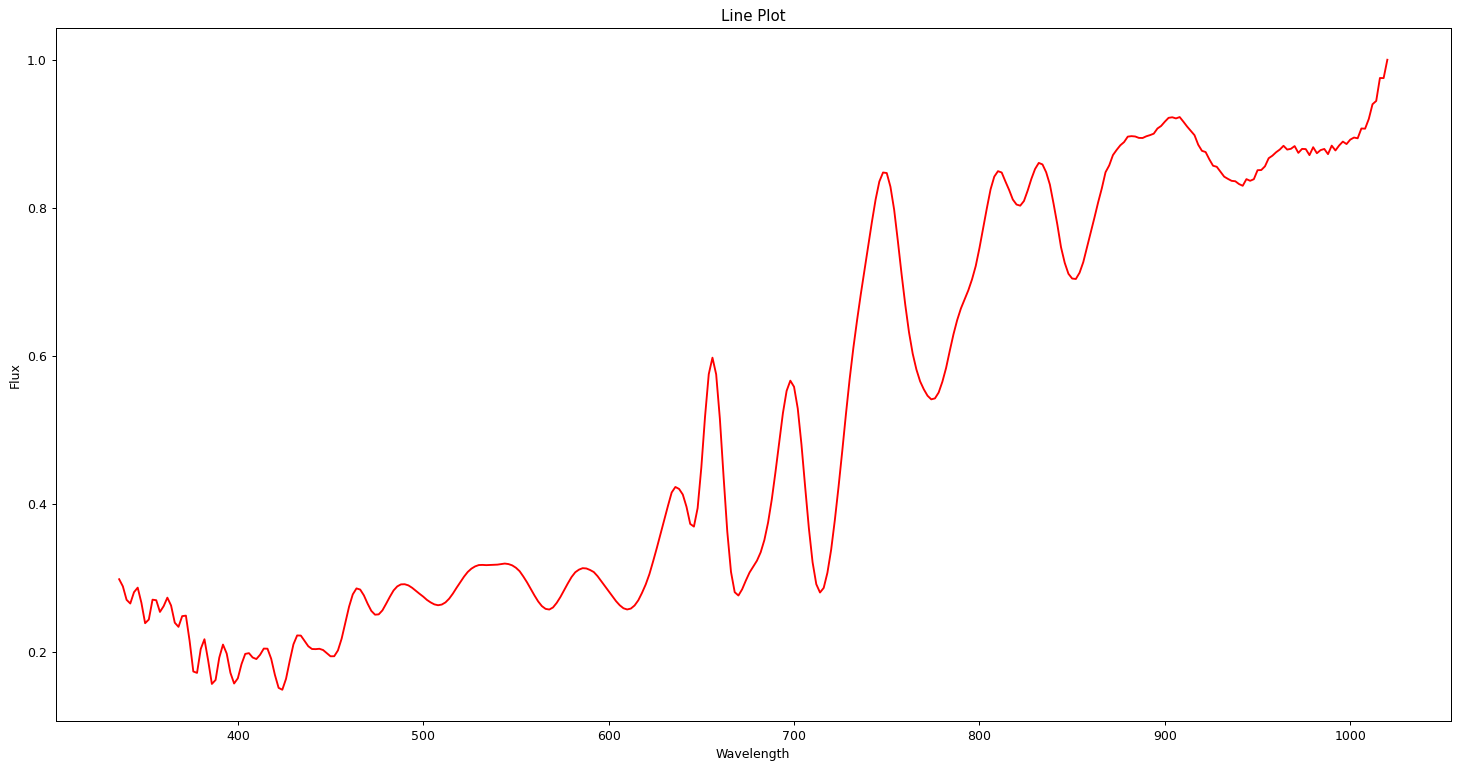

In [22]:
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt

# % matplotlib inline
plt.subplots(figsize=(20, 10), dpi=90)

# Create line plot
plt.plot(array, spectra)

# Set labels and title
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Line Plot')

# Display the plot
plt.show()


In [150]:
noise = np.random.normal(loc=0.0, scale=0.03, size=343)
noise

array([-6.16266074e-02, -3.50958292e-02,  4.62947009e-03, -2.82910268e-02,
        1.96236309e-02,  1.44773434e-02, -3.30866201e-02,  3.04376619e-02,
        2.43375014e-02, -4.40080059e-03,  3.91327512e-02,  1.51718324e-02,
       -5.64878250e-02,  5.63719013e-03, -2.43105019e-02,  3.29471793e-02,
        2.13122808e-03,  1.24609950e-02,  4.22461162e-02,  5.86649027e-03,
        2.35553663e-02,  6.08956928e-02,  7.50111090e-03, -2.49177068e-02,
        2.71805409e-02,  2.71897302e-02,  8.55088708e-03, -9.75725662e-04,
        5.45796189e-02,  3.51127876e-02, -1.54810218e-02, -2.52924321e-03,
       -1.39044778e-02,  4.89504791e-02,  4.51938633e-02,  1.80888289e-02,
        1.24669291e-03, -1.16825058e-02,  2.13554570e-03, -4.91605570e-02,
        9.62633516e-04, -3.90687956e-02,  1.09556028e-02, -6.73336967e-02,
        2.46435027e-02,  4.49212873e-02, -5.66293102e-02,  8.21831347e-03,
        2.19265181e-02,  1.33253623e-02, -7.12978466e-02,  4.06756151e-02,
       -1.64837868e-02,  

In [151]:
spectra_noise = spectra + noise
spectra_noise

0      0.236914
1      0.253814
2      0.275357
3      0.237454
4      0.300626
         ...   
338    0.975946
339    0.930113
340    1.003397
341    0.997013
342    0.996218
Name: 0, Length: 343, dtype: float64

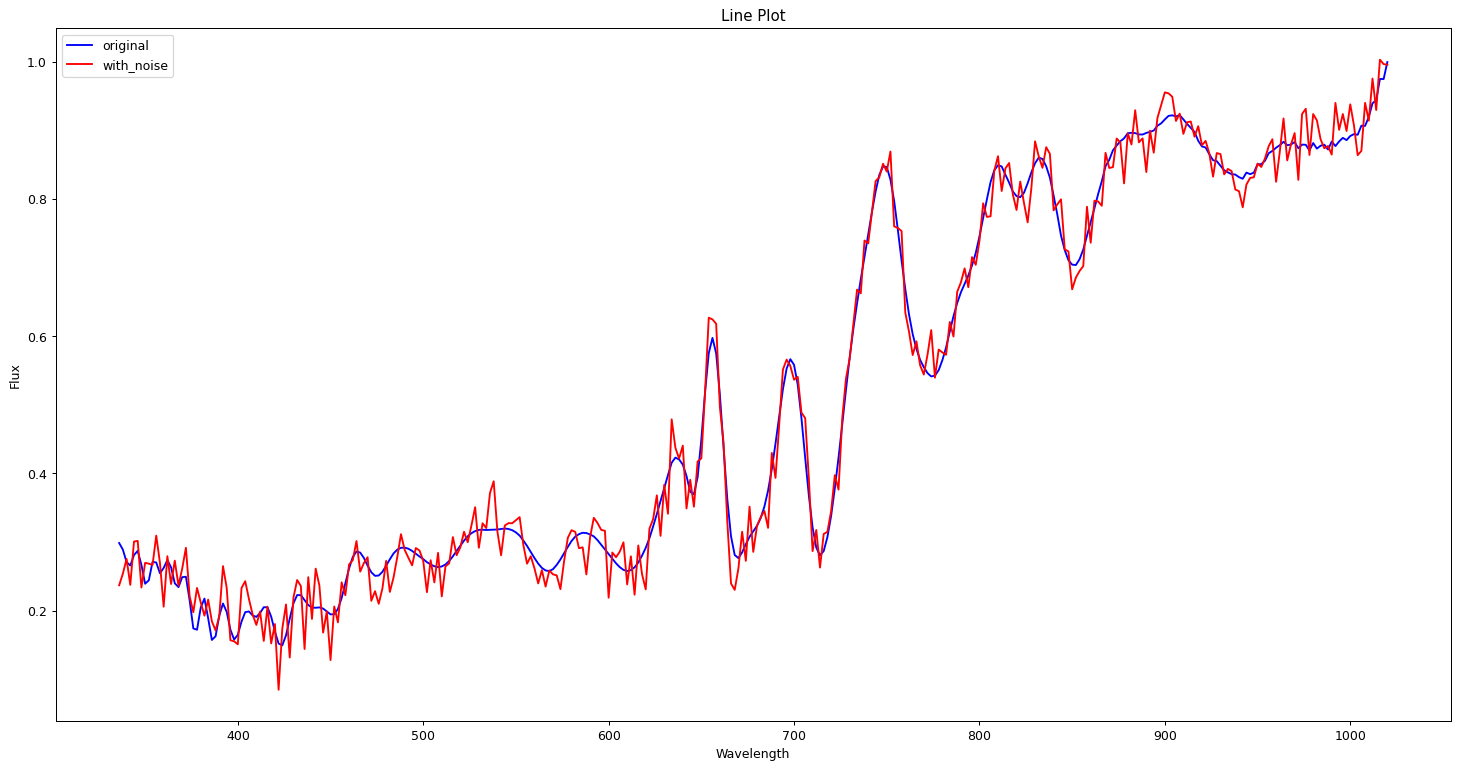

In [152]:
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt

# % matplotlib inline
plt.subplots(figsize=(20, 10), dpi=90)

# Create line plot
plt.plot(array, spectra, c='blue', label='original')
plt.plot(array, spectra_noise, c='red', label='with_noise')

# Set labels and title
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Line Plot')
plt.legend()

# Display the plot
plt.show()

In [325]:
import numpy as np
from scipy.interpolate import BSpline
import matplotlib.pyplot as plt

# Sample data points
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([0, 1, 4, 9, 16, 25, 32, 45, 51, 62, 86])

# Degree of the spline
n = 3

# Create a spline object
spline = BSpline(array, spectra_noise, n)

# Evaluate the spline on a finer grid
x_new = np.linspace(336, 1020, 150)
y_new = spline(x_new)

# Plot the original data points and the spline
plt.figure()
# % matplotlib inline
plt.subplots(figsize=(20, 12), dpi=90)

plt.plot(x_new, y_new, label='Spline (Degree {})'.format(n))
# Create line plot
plt.plot(array, spectra, c='blue', label='original')
# plt.plot(array, spectra_noise, c='red', label='with_noise')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Spline Interpolation (Degree {})'.format(n))
plt.show()

NameError: name 'array' is not defined

<Figure size 640x480 with 0 Axes>

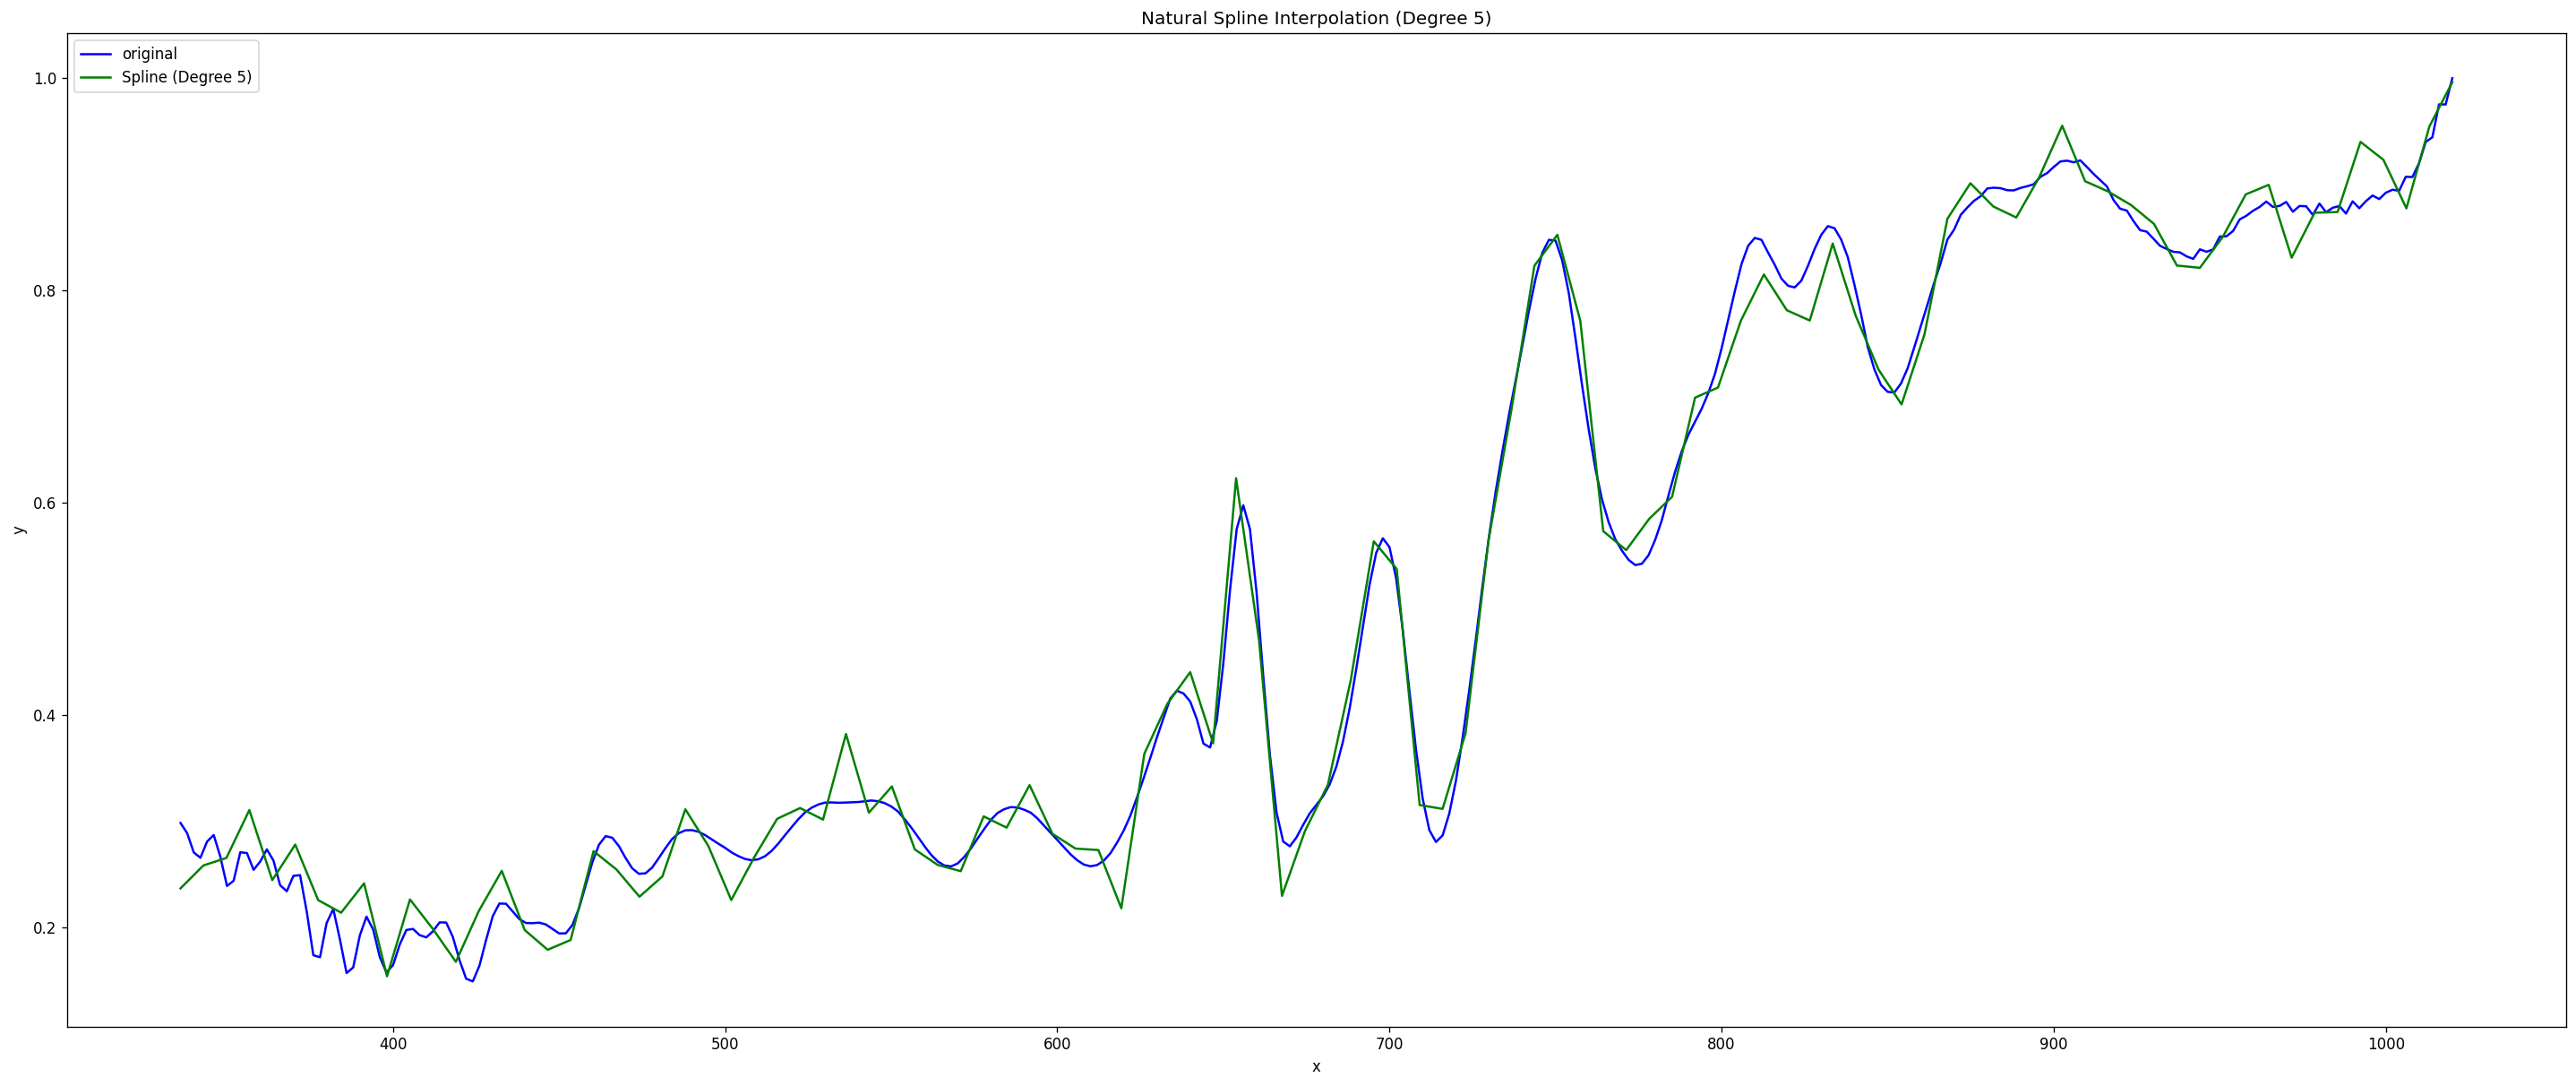

In [167]:
import numpy as np
from scipy.interpolate import splrep, splev
import matplotlib.pyplot as plt

# Sample data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 4, 9, 16, 25])

# Degree of the spline
n = 5

# Generate spline coefficients
tck = splrep(array, spectra_noise, k=n)

# Evaluate the spline on a finer grid
x_new = np.linspace(336, 1020, 100)
y_new = splev(x_new, tck)

# Plot the original data points and the spline
plt.figure()
# % matplotlib inline
plt.subplots(figsize=(30, 12), dpi=120)
# Create line plot
plt.plot(array, spectra, c='blue', label='original')
# plt.plot(array, spectra_noise, c='red', label='with_noise')
plt.plot(x_new, y_new, c='green', label='Spline (Degree {})'.format(n))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Natural Spline Interpolation (Degree {})'.format(n))
plt.show()

In [324]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Create a natural spline object
spline = CubicSpline(array, spectra_noise, bc_type='natural')
# spline = CubicSpline(array, spectra_noise)

# Evaluate the spline on a finer grid
x_new = np.linspace(336, 1020, 100)
y_new = spline(x_new)

# Plot the original data points and the spline
plt.figure()
# % matplotlib inline
plt.subplots(figsize=(30, 12), dpi=120)
plt.plot(x_new, y_new, label='Natural Spline')
plt.plot(array, spectra, c='blue', label='original')
# plt.plot(array, spectra_noise, c='red', label='with_noise')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Natural Spline Interpolation')
plt.show()

NameError: name 'array' is not defined

In [3]:
spectra_df = spectra_df.drop(spectra_df.columns[-1], axis=1)

# Convertir espectros a una matriz de NumPy
spectra = spectra_df.to_numpy()

# Calcular la cantidad de espectros a generar con ruido
n_new_spectra = 1011 - spectra.shape[0]

# Generar nuevos espectros con ruido hasta alcanzar la cantidad deseada
while n_new_spectra > 0:
    # Generar ruido blanco con una desviación estándar (scale) de 0.05
    # loc se establece en 0.0, lo que hace referencia que se generará una distribución
    # normal centrada en cero.
    # Size: toma el tamaño del df de los espectros, para tomar la misma forma

    noise = abs(np.random.normal(loc=0.0, scale=0.05, size=spectra.shape))

    # Agregar ruido blanco a los espectros normalizados
    noisy_spectra = spectra + noise

    # Agregar los nuevos espectros con ruido al conjunto de datos
    spectra = np.concatenate((spectra, noisy_spectra))

    # Actualizar la cantidad de espectros que faltan generar
    n_new_spectra = 1011 - spectra.shape[0]

In [10]:
noise = np.random.normal(loc=0.0, scale=0.05, size=spectra.shape)

In [12]:
spectra.shape

(1544, 342)

In [11]:
noise

array([[-0.00689019,  0.03790323,  0.00528483, ..., -0.00423495,
        -0.01213678,  0.0052733 ],
       [ 0.01577014,  0.02038461, -0.06013881, ..., -0.03217446,
        -0.01028443,  0.10930992],
       [ 0.06296396, -0.02442133, -0.02383874, ..., -0.07541865,
        -0.08702712,  0.00703959],
       ...,
       [ 0.0076325 , -0.01342856,  0.00278255, ...,  0.0812699 ,
        -0.00237505, -0.03129096],
       [ 0.09520687,  0.01753374,  0.01074861, ...,  0.05155001,
         0.01347912, -0.00437217],
       [ 0.03100988, -0.02824778, -0.03603634, ...,  0.00590464,
         0.04061067, -0.01772358]])

In [6]:
# Convertir los espectros de NumPy a un DataFrame de Pandas
new_spectra_df = pd.DataFrame(spectra)

new_spectra_df = new_spectra_df.assign(id=1)

new_spectra_df = new_spectra_df.iloc[:1011]

# Guardar los nuevos espectros con ruido en un archivo CSV
new_spectra_df.to_csv('Data/espectros_con_ruido_SY.csv', index=False)

NOTAS:
scale se establece en 0.05, lo que significa que se generará una distribución normal con una desviación estándar de 0.05. Esta distribución se utilizará para agregar ruido aleatorio a los datos de los espectros estelares. El valor de scale puede ser ajustado para generar distribuciones normales con diferentes grados de dispersión de los valores generados, lo que afectará la amplitud y la forma del ruido que se agrega a los datos.
